# <font style="color:blue">YOLOv3 Assignment</font>


# <font style="color:blue">1. Link Google Drive</font>
I found it easier to use Google Drive while training and testing, but let me knwow if you prefer a solution that doesn't need it.

### <font style="color:green">Link google drive</font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


# <font style="color:blue">2. Clone and build DarkNet repository </font>
Build darknet from source. These setps can be skipped if darknet is already available

In [4]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Total 15490 (delta 0), reused 0 (delta 0), pack-reused 15490
Receiving objects: 100% (15490/15490), 14.06 MiB | 8.32 MiB/s, done.
Resolving deltas: 100% (10411/10411), done.
Checking out files: 100% (2057/2057), done.


In [5]:
%cd darknet

/content/drive/My Drive/darknet


In [6]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

Building. . . It might take 2-3 minutes


# <font style="color:blue">3. Download config files</font>
This will download the class names and config files i did modify for training with the facemask dataset

In [7]:
!gdown "1vIGuTDIPbxGpInYDhtc44iDmGQkcxel2"
!gdown "1vGYLcxBzaYV93f4UDMih7ZC55XwoUAkG"
!gdown "1zjpmsB1i-yt99PLvp70AWHu-O2Pe_fTl"
!gdown "1v98eWlEhhTIVGMb8Cbxw7advaVXryXmB"


Downloading...
From: https://drive.google.com/uc?id=1vIGuTDIPbxGpInYDhtc44iDmGQkcxel2
To: /content/drive/MyDrive/darknet/class.names
100% 11.0/11.0 [00:00<00:00, 20.8kB/s]
Downloading...
From: https://drive.google.com/uc?id=1vGYLcxBzaYV93f4UDMih7ZC55XwoUAkG
To: /content/drive/MyDrive/darknet/yolov3-facemask-test.cfg
100% 8.45k/8.45k [00:00<00:00, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zjpmsB1i-yt99PLvp70AWHu-O2Pe_fTl
To: /content/drive/MyDrive/darknet/yolov3-facemask-train.cfg
100% 8.45k/8.45k [00:00<00:00, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1v98eWlEhhTIVGMb8Cbxw7advaVXryXmB
To: /content/drive/MyDrive/darknet/yolov3-facemask-setup.data
100% 95.0/95.0 [00:00<00:00, 189kB/s]


# <font style="color:blue">4. Download trained weigths</font>
These are the final weigths I did obtain after training

In [8]:
!gdown "1BZGlyk9Mi8OFj79NUh3MDoCIlHlqVgp4"

Downloading...
From: https://drive.google.com/uc?id=1BZGlyk9Mi8OFj79NUh3MDoCIlHlqVgp4
To: /content/drive/MyDrive/darknet/yolov3-facemask-train_last.weights
100% 246M/246M [00:02<00:00, 94.5MB/s]


# <font style="color:blue">5. Test images</font>
Use trained model for detection with the assignment images.

Utility function for display.

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

### <font style="color:green">5.1. Test Image 1</font>

In [10]:
!wget "https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1" -O test1.jpg

--2022-09-10 23:43:21--  https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/fxei8rit9v2n83s/test-image1.jpg [following]
--2022-09-10 23:43:21--  https://www.dropbox.com/s/dl/fxei8rit9v2n83s/test-image1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6dfdf29613c510ae45a2110656.dl.dropboxusercontent.com/cd/0/get/Bsu8DdFDgaSGXQ8wDcYxy0623LA45TA1QccN4a8EZNxRbEypQm9Br2zRKN9LRKVkWU35rranbU7abnObeFEo7syo8g3n31QNynVt2WXemZKFMXb2eBwOKNGUrehGLG06Lnnzkssph3ZB7F0YECLIn8iEzEM6OWsro8grHJC7JWpyEaT3h5AXzCd5gETF_7sfTqM/file?dl=1# [following]
--2022-09-10 23:43:21--  https://uc6dfdf29613c510ae45a2110656.dl.dropboxusercontent.com/cd/0/get/Bsu8DdFDgaSGXQ8wDcYxy0623LA45TA1QccN4a8EZNxRbEyp

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut

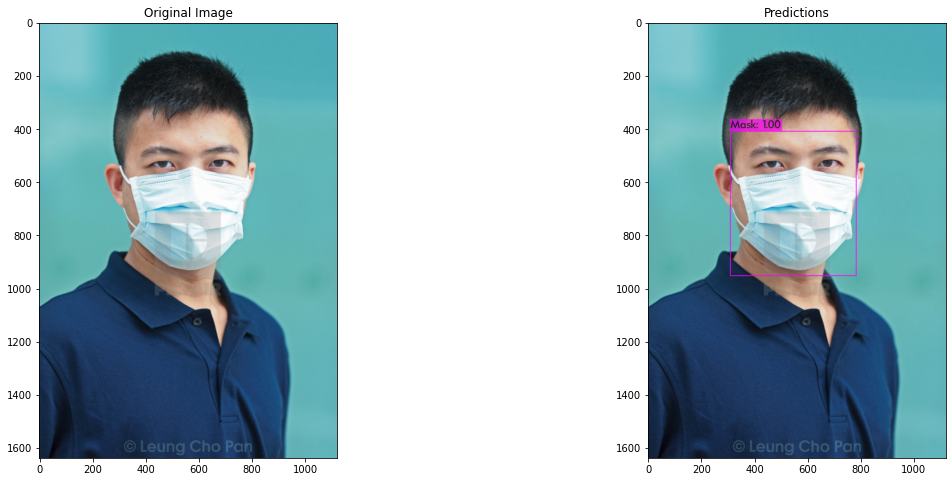

In [11]:
!./darknet detector test yolov3-facemask-setup.data yolov3-facemask-test.cfg yolov3-facemask-train_last.weights test1.jpg -thresh .6
display_output("test1.jpg")

### <font style="color:green">5.2. Test Image 2</font>

In [12]:
!wget "https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1" -O test2.jpg

--2022-09-10 23:43:56--  https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/ia1fijzr69ytpp1/test-image2.jpg [following]
--2022-09-10 23:43:57--  https://www.dropbox.com/s/dl/ia1fijzr69ytpp1/test-image2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1872b473b36ce1a009be49ec6a.dl.dropboxusercontent.com/cd/0/get/BssWVEKt4kIILcpMeOl3LCatrxl3yRHqNHw37id63JiiunmQMTZet3ul7zeq9tfrFxHZ5aUKxEsewD46e_R852AqboUYCfRV6YXajKX2A-GJzFIs7s2Byh8XKerG54HsEDOXHF1SFAA_yTZ8uiw4dnE0f1pguYGupWiHQljoBNQfy1BXy6xBmRLgkOEUl-2i8-g/file?dl=1# [following]
--2022-09-10 23:43:57--  https://uc1872b473b36ce1a009be49ec6a.dl.dropboxusercontent.com/cd/0/get/BssWVEKt4kIILcpMeOl3LCatrxl3yRHqNHw37id63JiiunmQ

net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 243 K-images (3 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test2.jpg: Predicted in 28.405000 milli-seconds.
Mask: 100%
Mask: 96%
NoMask: 95%
Mask: 97%


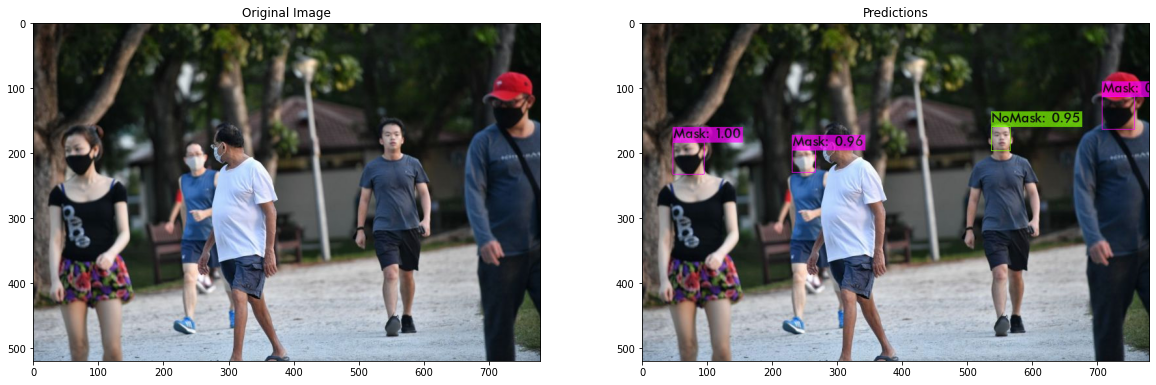

In [13]:
!./darknet detector test yolov3-facemask-setup.data yolov3-facemask-train.cfg yolov3-facemask-train_last.weights test2.jpg -thresh .6  2> /dev/null
display_output("test2.jpg")

### <font style="color:green">5.3. Test Image 3</font>

In [ ]:
!wget "https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1" -O test3.jpg

--2022-09-04 15:48:38--  https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/g905k4r1git5kbx/test-image3.jpg [following]
--2022-09-04 15:48:38--  https://www.dropbox.com/s/dl/g905k4r1git5kbx/test-image3.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8f743bbe5cdabb1c758f22584e.dl.dropboxusercontent.com/cd/0/get/BsW0IDH6V-jVw83ghELNT4zA9m6PyazQycWUC9Rm_AQrhlij4jdCroaRE45SGpQft6VHokQKIUcOsFXLO3axXS4_5TPYcO__a1jvjpXC_LziddlSouo8Z6_kamf3-jZbzQjJu-9BdFSjwESh6yw_bJkQmRHE9_Mo2eMq4DiFBzj5Fh_yJZoLpFjVB9sXbLkcpDE/file?dl=1# [following]
--2022-09-04 15:48:38--  https://uc8f743bbe5cdabb1c758f22584e.dl.dropboxusercontent.com/cd/0/get/BsW0IDH6V-jVw83ghELNT4zA9m6PyazQycWUC9Rm_AQrhlij

net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 243 K-images (3 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test3.jpg: Predicted in 28.683000 milli-seconds.
Mask: 100%
Mask: 100%
NoMask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 99%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 95%
Mask: 100%
Mask: 99%


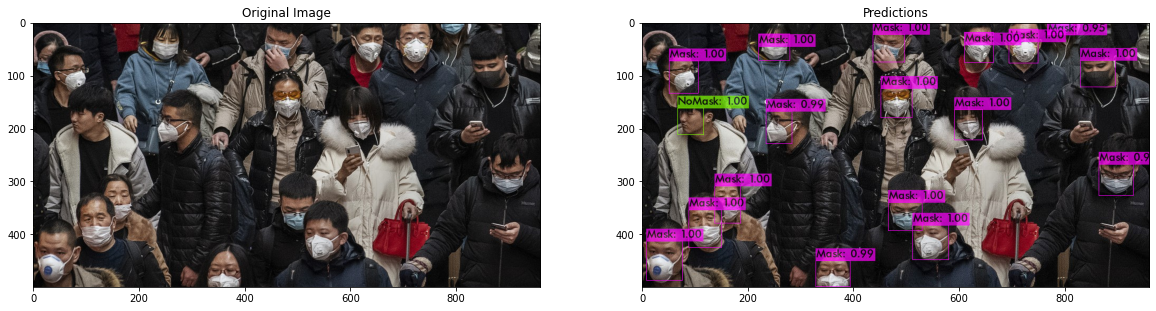

In [ ]:
!./darknet detector test yolov3-facemask-setup.data yolov3-facemask-train.cfg yolov3-facemask-train_last.weights test3.jpg -thresh .6  2> /dev/null
display_output("test3.jpg")

### <font style="color:green">5.4. Test Image 4</font>

In [14]:
!wget "https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1" -O test4.jpg

--2022-09-10 23:44:28--  https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/90ggmiur7b8g35m/test-image4.jpg [following]
--2022-09-10 23:44:28--  https://www.dropbox.com/s/dl/90ggmiur7b8g35m/test-image4.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc029d0d7ef637da7fea2103ca3e.dl.dropboxusercontent.com/cd/0/get/BsunvV0x65uY2qFaB6AcdiKZ40quIQP5q9Ef3cFEZjEPVcpgFfJyRRQB2kFJQiTWSgjsMqq5rpPBW4Yu3EwG-ugxDRupxrdndMinn7xk3WDXXTBOFZfV0TlBBLmt5PC8Inu9hYFX-BBN4U19oit2XpkLSfT2i53wa5crYY5bx4ZAbtLu77MoynZ2OycFQZZGico/file?dl=1# [following]
--2022-09-10 23:44:28--  https://uc029d0d7ef637da7fea2103ca3e.dl.dropboxusercontent.com/cd/0/get/BsunvV0x65uY2qFaB6AcdiKZ40quIQP5q9Ef3cFEZjEPVcpg

net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 243 K-images (3 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test4.jpg: Predicted in 28.606000 milli-seconds.
NoMask: 98%
NoMask: 69%
Mask: 100%
Mask: 100%
Mask: 100%
NoMask: 93%
Mask: 99%


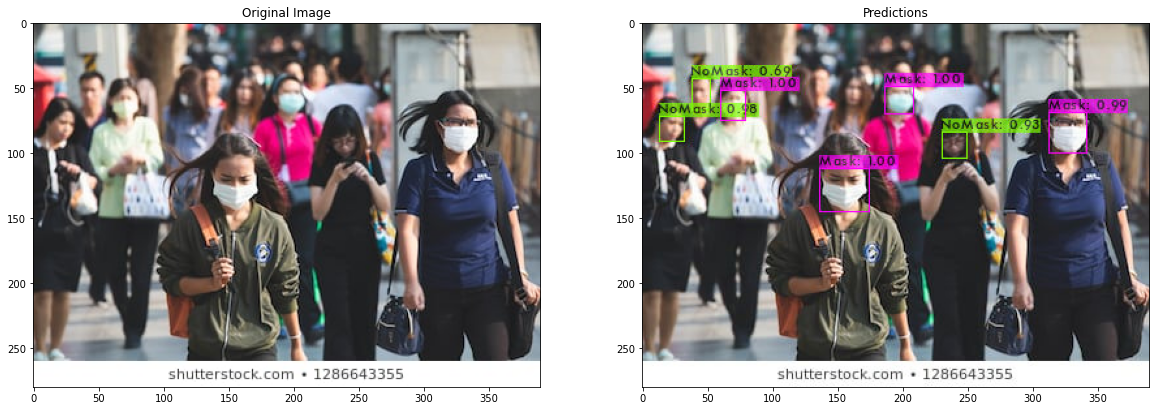

In [15]:
!./darknet detector test yolov3-facemask-setup.data yolov3-facemask-train.cfg yolov3-facemask-train_last.weights test4.jpg -thresh .6 2> /dev/null
display_output("test4.jpg")

### <font style="color:green">5.5. Test Video 1</font>
Result for test video will be output in the darknet folder in google dirve. The results can be reproduced with the visualizer in google drive, but It could take a long time for the videos to be processed online. It is better to download the output and view it locally. Additionally, here is the link for the pre-processed output: https://youtu.be/nr3vUepc2Ts

In [16]:
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O test-video1.mp4

--2022-09-10 23:48:18--  https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/pds0w3z5y7w89oz/test-video1.mp4 [following]
--2022-09-10 23:48:19--  https://www.dropbox.com/s/dl/pds0w3z5y7w89oz/test-video1.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc65794bc35dfc1de5d935134677.dl.dropboxusercontent.com/cd/0/get/BstqeW_2ewT13xOXam1txpBb3GxEtgQvmxBBE3fU1BTYGa3XfnOVwNZ125Z8BTLUhzX7C_Wv79HW8LnyzhBQzJ5hkhEDcSo3XAFsZuL_c3rFzobHQkhqqEn0JF6D6OK7yX1eLfMulBFALT8kIsNQUsULxRyas_DcqN5SaqSfrYbZ7ifP4HYi86wUyKUc1DWcbTk/file?dl=1# [following]
--2022-09-10 23:48:19--  https://uc65794bc35dfc1de5d935134677.dl.dropboxusercontent.com/cd/0/get/BstqeW_2ewT13xOXam1txpBb3GxEtgQvmxBBE3fU1BTYGa3X

In [17]:
!./darknet detector demo yolov3-facemask-setup.data yolov3-facemask-train.cfg yolov3-facemask-train_last.weights -dont_show test-video1.mp4 -i 0 -out_filename out_test-video1.mp4 -thresh .6

Streaming output truncated to the last 5000 lines.
FPS:28.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 100% 
NoMask: 98% 
Mask: 100% 
Mask: 85% 

FPS:28.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 100% 
NoMask: 97% 
Mask: 100% 
Mask: 96% 

FPS:28.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 100% 
NoMask: 98% 
Mask: 100% 
Mask: 99% 

FPS:28.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 99% 
NoMask: 99% 
NoMask: 98% 
Mask: 100% 
Mask: 99% 

FPS:28.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 99% 
NoMask: 99% 
NoMask: 98% 
Mask: 100% 
Mask: 99% 

FPS:28.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 99% 
NoMask: 99% 
Mask: 100% 
Mask: 99% 
Mask: 98% 

FPS:28.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 98% 
NoMask: 98% 
Mask: 100% 
Mask: 99% 
Mask: 99% 

FPS:28.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

NoMask: 98% 
NoMask: 69% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 69% 

FPS:28.8 	 AVG_FPS:0.0

 cvWriteFrame 
O

### <font style="color:green">5.6. Test Video 2</font>
Same as the previous video, output will be available in darknet folder. Here the pre-processed result: https://youtu.be/T-HegMlZZKw

In [18]:
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O test-video2.mp4

--2022-09-10 23:51:41--  https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/sqwu0ktdtlxtdsd/test-video2.mp4 [following]
--2022-09-10 23:51:42--  https://www.dropbox.com/s/dl/sqwu0ktdtlxtdsd/test-video2.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccdf5042daf3508eda4c63b342e.dl.dropboxusercontent.com/cd/0/get/BstUO_0lXk-1P7TDIqtSUGKKOJAfdRZFgHM9Jm258wWfSvAmyoBXduYLcmX1MhPYRgK6Dcw5H5d-vxByC5M8KiHcjfEVjco24fr9AmtLEs5Xw9TE_WaJb6kMUj_tJ3wdHxi4Y4dgMYHrazFzhkMWr4o4rYIrezlvI9MRs6z42jXUbhPDxFqJhRXBFc--0xm2BwE/file?dl=1# [following]
--2022-09-10 23:51:42--  https://uccdf5042daf3508eda4c63b342e.dl.dropboxusercontent.com/cd/0/get/BstUO_0lXk-1P7TDIqtSUGKKOJAfdRZFgHM9Jm258wWfSvAm

In [19]:
!./darknet detector demo yolov3-facemask-setup.data yolov3-facemask-train.cfg yolov3-facemask-train_last.weights -dont_show test-video2.mp4 -i 0 -out_filename out_test-video2.mp4 -thresh .6

Streaming output truncated to the last 5000 lines.
NoMask: 99% 
NoMask: 97% 
NoMask: 91% 
NoMask: 88% 
NoMask: 73% 

FPS:27.0 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 97% 
NoMask: 96% 
NoMask: 95% 
NoMask: 75% 

FPS:27.3 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 96% 
NoMask: 96% 
NoMask: 62% 

FPS:26.8 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 96% 
NoMask: 96% 

FPS:27.1 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 97% 
NoMask: 96% 
NoMask: 90% 
NoMask: 83% 

FPS:26.7 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 97% 
NoMask: 85% 
NoMask: 71% 
NoMask: 66% 

FPS:27.1 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 99% 
NoMask: 92% 
Mask: 92% 

FPS:26.7 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 93% 
NoMask: 76% 
NoMask: 70% 
Mask: 92% 
Mask: 71% 

FPS:27.0 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 96% 
NoMask: 85% 

FPS:26.8 	 AVG_FPS:29.8

 cvWriteFrame 
Objects:

NoMask: 100% 
NoMask: 96% 
NoMask: 84%